In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv("/content/forestfires.csv")
df.head()

month  day  FFMC   DMC  ...  monthnov  monthoct  monthsep  size_category
0   mar  fri  86.2  26.2  ...         0         0         0          small
1   oct  tue  90.6  35.4  ...         0         1         0          small
2   oct  sat  90.6  43.7  ...         0         1         0          small
3   mar  fri  91.7  33.3  ...         0         0         0          small
4   mar  sun  89.3  51.3  ...         0         0         0          small

[5 rows x 31 columns]

In [3]:
df.shape

(517, 31)

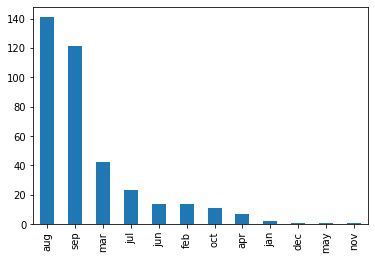

In [4]:
(df[df["size_category"]=="small"])["month"].value_counts().plot.bar()    

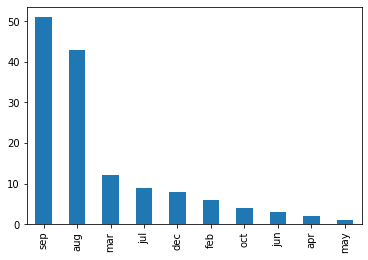

In [5]:
(df[df["size_category"]=="large"])["month"].value_counts().plot.bar() 

1) As we can see During august and sep month we can see both large and small burned sized area of forest.

2) During may and nov month there is almost no or less forest area burned.

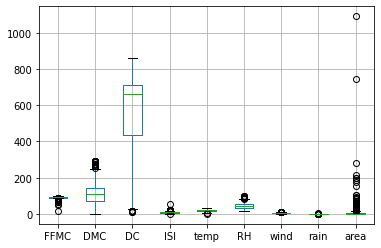

In [11]:
df.iloc[:,2:11].boxplot()

Removing unnessesary column

In [13]:
df2=df.drop(columns=["month","day"])
df2

FFMC    DMC     DC   ISI  ...  monthnov  monthoct  monthsep  size_category
0    86.2   26.2   94.3   5.1  ...         0         0         0          small
1    90.6   35.4  669.1   6.7  ...         0         1         0          small
2    90.6   43.7  686.9   6.7  ...         0         1         0          small
3    91.7   33.3   77.5   9.0  ...         0         0         0          small
4    89.3   51.3  102.2   9.6  ...         0         0         0          small
..    ...    ...    ...   ...  ...       ...       ...       ...            ...
512  81.6   56.7  665.6   1.9  ...         0         0         0          large
513  81.6   56.7  665.6   1.9  ...         0         0         0          large
514  81.6   56.7  665.6   1.9  ...         0         0         0          large
515  94.4  146.0  614.7  11.3  ...         0         0         0          small
516  79.5    3.0  106.7   1.1  ...         1         0         0          small

[517 rows x 29 columns]

In [14]:
x=df2.iloc[:,0:-1]
y=df2["size_category"]

In [15]:
x.head()

FFMC   DMC     DC  ISI  ...  monthmay  monthnov  monthoct  monthsep
0  86.2  26.2   94.3  5.1  ...         0         0         0         0
1  90.6  35.4  669.1  6.7  ...         0         0         1         0
2  90.6  43.7  686.9  6.7  ...         0         0         1         0
3  91.7  33.3   77.5  9.0  ...         0         0         0         0
4  89.3  51.3  102.2  9.6  ...         0         0         0         0

[5 rows x 28 columns]

In [16]:
y.head()

0    small
1    small
2    small
3    small
4    small
Name: size_category, dtype: object

splitting data into train test

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

# grid search cv

In [23]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,6,0.1],'C':[15,14,13,12,11,10,9,8,7,5,4,3,2,1,0.1,0.001] }]  
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 9, 8, 7, 5, 4, 3, 2, 1,
                                0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 6, 0.1],
                          'kernel': ['rbf']}])

In [24]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.74)

**Using best parameters**

In [25]:
values=list(gsv.best_params_.values())
clf = SVC(C= values[0], gamma = values[1])
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 72.51461988304094


array([[  0,  47],
       [  0, 124]])